In [ ]:
#importing libraries
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical #kerasta labellear 0,1,2,3,4,5,6,7,8,9 yazmak yerine categorical hale getirilir.
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2 #open cv kütüphanesi
import numpy as np

cv2 (open cv kütüphanesi) -> cifar dataseti içerisinde bulunan görseller vgg modeline input olarak verilirken 48x48 boyutunda olmalıdır. Ancak cifar dataseti içerisindeki görseller bu boyutta değildir. Bu yüzden görsellerin boyutunun open cv kütüphanesi ile değiştirilmesi lazımdır.

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data() #cifar datası yüklenir.
print("x_train shape",x_train.shape)
print("train sample:",x_train.shape[0])

train datasında 50000 sample bulunmaktadır.

32x32 boyutundadır.

3 -> rgb, renkli görsellerdir.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

In [ ]:
numberOfClass = 10

cifar datasında 10 farklı görsel bulunduğundan class sayısı 10 olarak belirlenir.

In [ ]:
y_train = to_categorical(y_train, numberOfClass)
y_test = to_categorical(y_test, numberOfClass)

y_train ve y_test label'ları class sayısı kadar kategori haline getirilir.

In [ ]:
input_shape = x_train.shape[1:]

cifar datasındaki görsellerin boyutuna bakılmıştır.

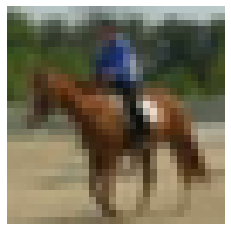

In [ ]:
#visualize
plt.imshow(x_train[551].astype(np.uint8))
plt.axis("off")
plt.show()

imshow -> image show demektir, bir görsel plot ettirilirken kullanılır.

In [ ]:
#increase dimension
def resize_img(img):
    numberOfImage = img.shape[0] #img.shape[0] -> 50000 sample için boyut genişletme uygulanır.
    new_array = np.zeros((numberOfImage, 48,48,3)) 
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

VGG-19 modeline ImageNet datasındaki görseller 48x48 boyutundadır.

Cifar-10 datasındaki görsellerin VGG-19 modeline uygun olması için boyutları genişletilmiştir.

Open CV kütüphanesi çağırılarak resize methodu kullanılmıştır.

In [ ]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("increased dim x_train: ",x_train.shape)

increased dim x_train:  (50000, 48, 48, 3)


train ve test datasının boyutları değiştiği görülür.

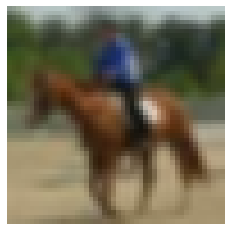

In [ ]:
plt.figure()
plt.imshow(x_train[551].astype(np.uint8))
plt.axis("off")
plt.show()

Görseldeki piksellerde artış gözükmektedir.

In [ ]:
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = (32,32,3))

görsellerin boyutu input_shape parametresi ile verilmiştir.

weight'lerin imagenet olmasının sebebi vgg-19 transfer learning modeli olduğu için daha önceden ImageNet datasıyla eğitilen parametreler alınır.

include_top parametresi False olduğunda vgg-19 modelindeki fully connected layer (ann kısmı) alınmayacaktır.

In [ ]:
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Fully connected layer alınmadığı için son layer olarak max pooling'in alındığı görülür.

VGG gibi transfer learning modellerinde genelde fully connected layer değiştirilir.

In [ ]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x000001D6F99224F0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D6929E09A0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D6929E0C10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001D692A8F430>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D6929E0F10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D692A8FAF0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001D698F80D60>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D698F80940>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D698F683A0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D698F90DC0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D698F845E0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001D698F96B20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001D698F90EE0>, <keras.layers.convolutional.conv2d

Tüm layerlar liste halinde yazdırılmıştır.

In [ ]:
model = Sequential()
for layer in vgg_layer_list:
    model.add(layer)

Layerlar sıralı bir şekilde sıralandığı için Sequential methoduyla modele eklenir.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [ ]:
for layer in model.layers:
    layer.trainable = False

ImageNet datasıyla train edilmiş weight değerleri kullanılacağından train özelliği kapatılır.

In [ ]:
#fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberOfClass, activation= "softmax"))

Flatten ile pikseller tek satırdan oluşan bir vektör haline getirilir. 

128 node'dan oluşan bir hidden layer eklenir.

Multiclass classification olduğu için activation function olarak softmax function kullanılmıştır.

Output layer'da datadaki class sayısı kadar node bulunacaktır.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

Modele flatten, hidden layer, output layer'ın eklendiği görülür.

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

loss -> categorical cross entropy hesaplanarak bulunur.

learning rate'i optimize etmek için rmsprop kullanılacaktır.

metrics -> accuracy'e bakılacaktır.

In [ ]:
hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 50, batch_size = 1500)

Epoch 1/50
27/27 [==============================] - 13s 332ms/step - loss: 15.4860 - accuracy: 0.3293 - val_loss: 11.1805 - val_accuracy: 0.3843
Epoch 2/50
27/27 [==============================] - 7s 255ms/step - loss: 8.4008 - accuracy: 0.4294 - val_loss: 7.8378 - val_accuracy: 0.4294
Epoch 3/50
27/27 [==============================] - 7s 255ms/step - loss: 6.8559 - accuracy: 0.4548 - val_loss: 7.2947 - val_accuracy: 0.4179
Epoch 4/50
27/27 [==============================] - 7s 257ms/step - loss: 6.1079 - accuracy: 0.4685 - val_loss: 7.2447 - val_accuracy: 0.3902
Epoch 5/50
27/27 [==============================] - 7s 257ms/step - loss: 5.7310 - accuracy: 0.4724 - val_loss: 5.1977 - val_accuracy: 0.4675
Epoch 6/50
27/27 [==============================] - 7s 257ms/step - loss: 5.1820 - accuracy: 0.4810 - val_loss: 4.5327 - val_accuracy: 0.4935
Epoch 7/50
27/27 [==============================] - 7s 258ms/step - loss: 4.8489 - accuracy: 0.4869 - val_loss: 6.1214 - val_accuracy: 0.4360
Epo

Validation datası validation_split parametresi ile train datasının yüzde 20'si alınarak oluşturulmuştur. 

In [ ]:
#model save
model.save_weights("transfer_learning_vgg19_cfar10.h5")

Cifar datasıyla eğitilmiş modelin weight değerleri kaydedilir.

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


History'de tutulan loss, accuracy, val_loss, val_accuracy değerleri görselleştirilecektir.

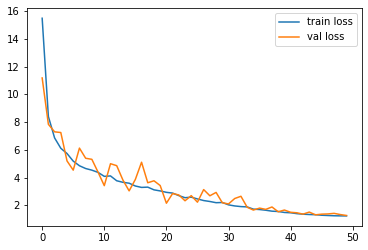

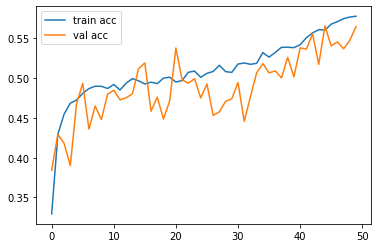

In [ ]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

In [ ]:
#save history
import json, codecs
with open("transfer_learning_vgg19_cfar10.json","w") as f:
    json.dump(hist.history,f)

Model kaydedilmiştir.

In [ ]:
#load
import json, codecs
with codecs.open("transfer_learning_vgg19_cfar10.json","r",encoding = "utf-8") as f:
    n = json.loads(f.read())

Kaydedilen model yüklenmiştir.

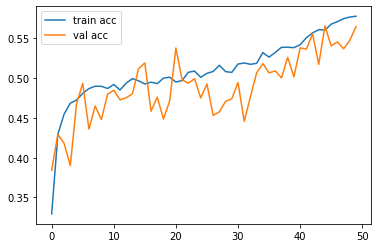

In [ ]:
plt.plot(n["accuracy"], label = "train acc")
plt.plot(n["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

Yüklenen modelin accuracy ve validation accuracy değerleri görselleştirilmiştir.